# Battle of the Neighbourhoods

This Note book holds the cleaning of the data from the data sets that were found, the visualisation and the Foursquare part of this task. The report that analyses the information and data in this NoteBook can be found on GitHub.

The data has been found on the loacal authorities online databases. The problem that will be resolved using these data frames is to find the best place to live or open up a business comparing two big cities in two different countries, New York City and London.

### Arrest rate data frame in NYC

In [1]:
import pandas as pd

data_arrest_NYC = pd.read_csv("https://raw.githubusercontent.com/Heather-Tymms/Coursera_Capstone/master/NYPD_Arrest_Data__Year_to_Date_.csv")

In [2]:
data_arrest_NYC.shape

(113651, 18)

In [3]:
columns_to_drop = data_arrest_NYC[["ARREST_KEY", "ARREST_DATE", "PD_CD", "PD_DESC", "KY_CD", "LAW_CODE", "LAW_CAT_CD", "X_COORD_CD", "Y_COORD_CD"]]
arrest_NYC = data_arrest_NYC.drop(columns = columns_to_drop, axis = 1, inplace = False)
arrest_NYC.head()

,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,FELONY ASSAULT,K,78,0,<18,M,BLACK,40.680570,-73.983925
1,BURGLARY,Q,104,0,25-44,M,BLACK,40.693587,-73.902781
2,DANGEROUS WEAPONS,K,73,0,18-24,M,BLACK,40.675770,-73.915162
3,VEHICLE AND TRAFFIC LAWS,Q,104,0,25-44,M,WHITE HISPANIC,40.712596,-73.880699
4,PETIT LARCENY,K,90,0,45-64,M,WHITE HISPANIC,40.703249,-73.944275


In [4]:
arrest_NYC["ARREST_BORO"].unique()

array(['K', 'Q', 'M', 'B', 'S'], dtype=object)

In [5]:
arrest_NYC["ARREST_BORO"].replace(to_replace = "B", value = "Bronx", inplace = True, regex=True)

In [6]:
arrest_NYC["ARREST_BORO"].replace(to_replace = "S", value = "Staton Island", inplace = True, regex=True)

In [7]:
arrest_NYC["ARREST_BORO"].replace(to_replace = "K", value = "Brooklyn", inplace = True, regex=True)

In [8]:
arrest_NYC["ARREST_BORO"].replace(to_replace = "M", value = "Manhatton", inplace = True, regex=True)

In [9]:
arrest_NYC["ARREST_BORO"].replace(to_replace = "Q", value = "Queens", inplace = True, regex=True)

In [10]:
URL_pop = "https://raw.githubusercontent.com/Heather-Tymms/Coursera_Capstone/master/NYC_Population_by_Borough.csv"
data_pop_NYC= pd.read_csv(URL_pop, sep=',')
data_pop_NYC

,Borough,Population
0,Brooklyn,4970026
1,Manhattan,3123068
2,Bronx,2717758
3,Queens,4460101
4,Staten Island,912458


In [11]:
arrestsNYC = arrest_NYC["ARREST_BORO"].value_counts().to_frame(name = "Arrest_Numbers")
arrestsNYC.reset_index(inplace=True)
arrestsNYC=arrestsNYC.rename(columns={"index": "BOROUGH"})
arrestsNYC

,BOROUGH,Arrest_Numbers
0,Brooklyn,31127
1,Manhatton,28206
2,Bronx,25866
3,Queens,23575
4,Staton Island,4877


In [12]:
arr = pd.concat([arrestsNYC, data_pop_NYC], axis=1)
arr

,BOROUGH,Arrest_Numbers,Borough,Population
0,Brooklyn,31127,Brooklyn,4970026
1,Manhatton,28206,Manhattan,3123068
2,Bronx,25866,Bronx,2717758
3,Queens,23575,Queens,4460101
4,Staton Island,4877,Staten Island,912458


In [13]:
arr= arr.drop("Borough", axis=1, inplace=False)
arr= arr.set_index("BOROUGH")
arr

,Arrest_Numbers,Population
BOROUGH,,
Brooklyn,31127,4970026
Manhatton,28206,3123068
Bronx,25866,2717758
Queens,23575,4460101
Staton Island,4877,912458


In [14]:
arr["arrest_per_thousand"]= (arr["Arrest_Numbers"]/arr["Population"])*1000

In [15]:
arrest= arr.drop(columns=["Arrest_Numbers","Population"], axis =1, inplace=False)

In [16]:
arrest = arrest.sort_index()


This shows the number of arrests in a 4 year period in each borough of NYC.

In [17]:
arrest= arrest.reset_index()
arrest

,BOROUGH,arrest_per_thousand
0,Bronx,9.517404
1,Brooklyn,6.262945
2,Manhatton,9.031504
3,Queens,5.285755
4,Staton Island,5.344904


### Housing prices in NYC

In [18]:
import numpy as np
data_house_NYC = pd.read_csv("https://raw.githubusercontent.com/Heather-Tymms/Coursera_Capstone/master/2018_citywide_sale_open.csv")
data_house_NYC.head()

,BOROUGH,BUILDING CLASS CATEGORY,NUMBER OF SALES,MINIMUM SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,MAXIMUM SALE PRICE
0,Manhattan,01 ONE FAMILY HOMES,89,200000.0,8235346.0,6350000.0,41000000.0
1,Manhattan,02 TWO FAMILY HOMES,74,424797.0,5620562.0,3725000.0,43500000.0
2,Manhattan,03 THREE FAMILY HOMES,40,816425.0,5684533.0,2965000.0,27400000.0
3,Bronx,01 ONE FAMILY HOMES,970,200000.0,499060.0,425000.0,12303058.0
4,Bronx,02 TWO FAMILY HOMES,1409,200000.0,523501.0,512000.0,5400000.0


In [19]:
columns = data_house_NYC[["BUILDING CLASS CATEGORY", "NUMBER OF SALES", "MINIMUM SALE PRICE", "MAXIMUM SALE PRICE"]]
data_house_NYC = data_house_NYC.drop(labels=columns, axis =1)

In [20]:
housing_NYC  = data_house_NYC.groupby(by= "BOROUGH", axis=0, as_index=True).mean()

In [21]:
housing_NYC

,AVERAGE SALE PRICE,MEDIAN SALE PRICE
BOROUGH,,
Bronx,5.359810e+05,5.123333e+05
Brooklyn,1.087048e+06,8.871667e+05
Citywide,8.781680e+05,6.916667e+05
Manhattan,6.513480e+06,4.346667e+06
Queens,7.993533e+05,7.546667e+05
Staten Island,5.594600e+05,5.422230e+05


In [22]:
housing_NYC = housing_NYC.reset_index(inplace=False)

In [23]:
housing_NYC = housing_NYC.drop([2])
housing_NYC = housing_NYC.reset_index()

In [24]:
housing_NYC = housing_NYC.drop("BOROUGH", axis=1, inplace=False)

In [25]:
NYC = pd.concat([arrest,housing_NYC],axis=1)

In [26]:
NYC

,BOROUGH,arrest_per_thousand,index,AVERAGE SALE PRICE,MEDIAN SALE PRICE
0,Bronx,9.517404,0,5.359810e+05,5.123333e+05
1,Brooklyn,6.262945,1,1.087048e+06,8.871667e+05
2,Manhatton,9.031504,3,6.513480e+06,4.346667e+06
3,Queens,5.285755,4,7.993533e+05,7.546667e+05
4,Staton Island,5.344904,5,5.594600e+05,5.422230e+05


In [27]:
NYC= NYC.set_index('BOROUGH')
NYC

,arrest_per_thousand,index,AVERAGE SALE PRICE,MEDIAN SALE PRICE
BOROUGH,,,,
Bronx,9.517404,0,5.359810e+05,5.123333e+05
Brooklyn,6.262945,1,1.087048e+06,8.871667e+05
Manhatton,9.031504,3,6.513480e+06,4.346667e+06
Queens,5.285755,4,7.993533e+05,7.546667e+05
Staton Island,5.344904,5,5.594600e+05,5.422230e+05


In [28]:
NYC = NYC.drop("index",axis=1)
NYC

,arrest_per_thousand,AVERAGE SALE PRICE,MEDIAN SALE PRICE
BOROUGH,,,
Bronx,9.517404,5.359810e+05,5.123333e+05
Brooklyn,6.262945,1.087048e+06,8.871667e+05
Manhatton,9.031504,6.513480e+06,4.346667e+06
Queens,5.285755,7.993533e+05,7.546667e+05
Staton Island,5.344904,5.594600e+05,5.422230e+05


In [29]:
NYC = NYC.drop("AVERAGE SALE PRICE", axis=1)

### Crime rates and house prices in LONDON, UK

In [30]:
URL_UK = "https://raw.githubusercontent.com/Heather-Tymms/Coursera_Capstone/master/london-borough-profiles.csv"
crime_UK = pd.read_csv(URL_UK, sep= ",", na_values = ".", keep_default_na=False, encoding= "ISO-8859-1")
crime_UK.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326.0,290,30.3,43.2,11.4,73.1,...,6.0,5.6,n/a,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188.0,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423.0,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736.0,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048.0,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [31]:
crime_lon = crime_UK[["Area_name", 'Crime_rates_per_thousand_population_2014/15', 'Median_House_Price,_2015']]

In [32]:
crime_UK.columns

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'GLA_Household_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', 'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_

In [33]:
crime_lon

,Area_name,Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015"
0,City of London,NaN,799999.0
1,Barking and Dagenham,83.4,243500.0
2,Barnet,62.7,445000.0
3,Bexley,51.8,275000.0
4,Brent,78.8,407250.0
5,Bromley,64.1,374975.0
6,Camden,123.5,700000.0
7,Croydon,77.0,300000.0
8,Ealing,75.5,430000.0
9,Enfield,69.4,320000.0


In [34]:
LDN = crime_lon.rename({"Crime_rates_per_thousand_population_2014/15":"arrest/1000"},axis=1)

In [35]:
LDN = LDN.set_index("Area_name")
LDN = LDN.dropna(axis=0, inplace=False)
LDN

,arrest/1000,"Median_House_Price,_2015"
Area_name,,
Barking and Dagenham,83.4,243500.0
Barnet,62.7,445000.0
Bexley,51.8,275000.0
Brent,78.8,407250.0
Bromley,64.1,374975.0
Camden,123.5,700000.0
Croydon,77.0,300000.0
Ealing,75.5,430000.0
Enfield,69.4,320000.0


In [36]:
LDN.shape

(36, 2)

## COMPARISON

### Cleaned Data Frames

In [37]:
NYC

,arrest_per_thousand,MEDIAN SALE PRICE
BOROUGH,,
Bronx,9.517404,5.123333e+05
Brooklyn,6.262945,8.871667e+05
Manhatton,9.031504,4.346667e+06
Queens,5.285755,7.546667e+05
Staton Island,5.344904,5.422230e+05


In [38]:
LDN.head()

,arrest/1000,"Median_House_Price,_2015"
Area_name,,
Barking and Dagenham,83.4,243500.0
Barnet,62.7,445000.0
Bexley,51.8,275000.0
Brent,78.8,407250.0
Bromley,64.1,374975.0


## VISULAISATION

In [39]:
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.1.0


In [40]:
# install seaborn
!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  conda-forge --> 2019.6.16-py36_1  anaconda
    openssl: 1.0.2r-h14c3975_0 conda-forge --> 1.0.2s-h7b6447c_0 anaconda


certifi-2019.6.16    | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Seaborn installed and imported!


In [41]:
print("The column names of NYC and London respectively are: ")
print(NYC.columns)
print(LDN.columns)

The column names of NYC and London respectively are: 
Index(['arrest_per_thousand', 'MEDIAN SALE PRICE'], dtype='object')
Index(['arrest/1000', 'Median_House_Price,_2015'], dtype='object')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Comparison of Arrest rate and House PRices in NYC')

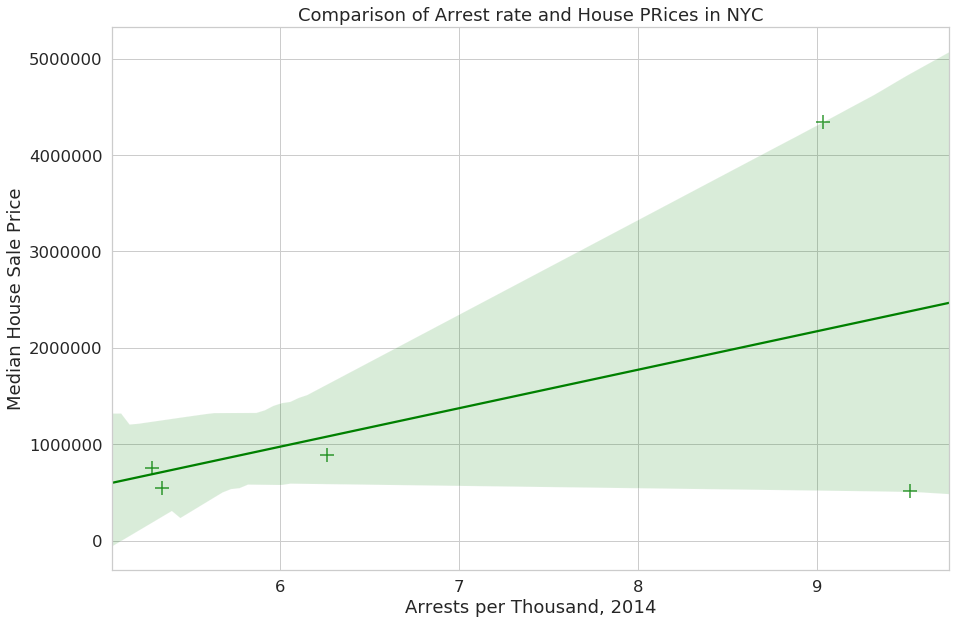

In [42]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

NYCreg = sns.regplot(x='arrest_per_thousand', y='MEDIAN SALE PRICE', data=NYC, color='green', marker='+', scatter_kws={'s': 200})

NYCreg.set(xlabel='Arrests per Thousand, 2014', ylabel='Median House Sale Price')
NYCreg.set_title('Comparison of Arrest rate and House PRices in NYC')

Text(0.5, 1.0, 'Comparison between Crime rate and Hosue price in London')

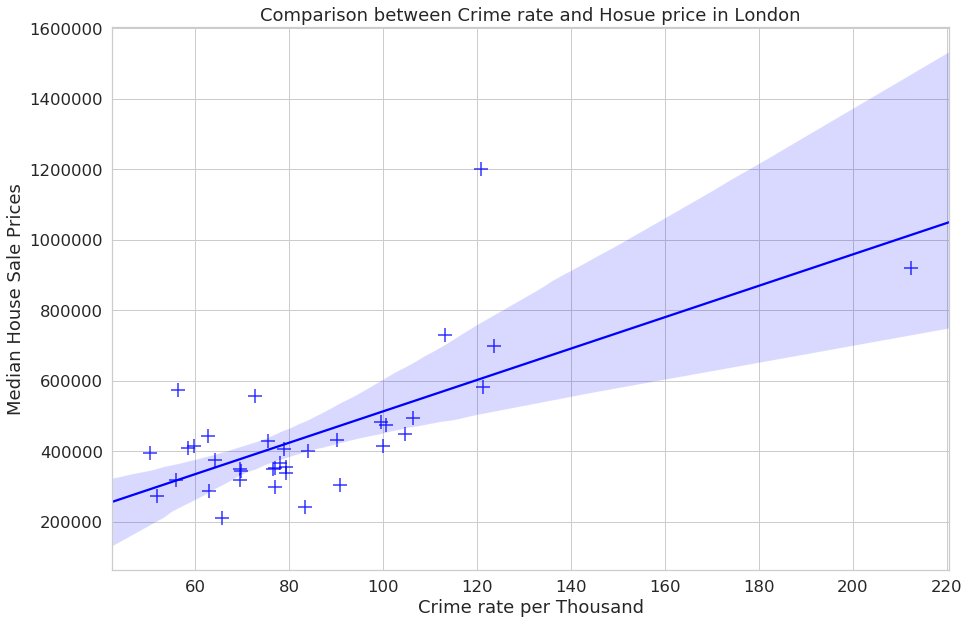

In [43]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

LDNreg = sns.regplot(x='arrest/1000', y='Median_House_Price,_2015', data=LDN, color='blue', marker='+', scatter_kws={'s': 200})

LDNreg.set(xlabel='Crime rate per Thousand', ylabel='Median House Sale Prices') 
LDNreg.set_title('Comparison between Crime rate and Hosue price in London')

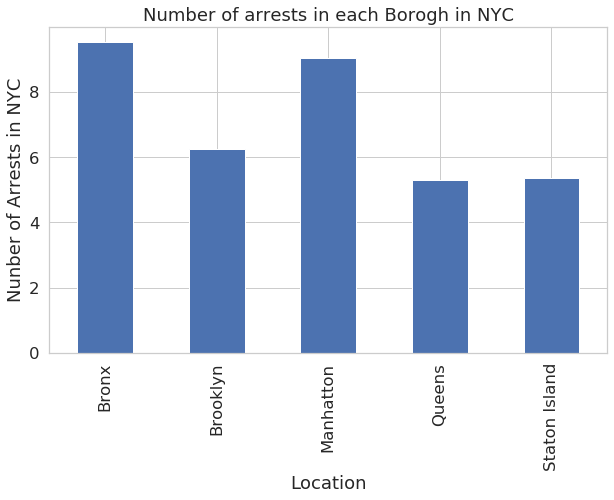

In [44]:
NYC["arrest_per_thousand"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Location')
plt.ylabel('Nunber of Arrests in NYC')
plt.title('Number of arrests in each Borogh in NYC')

plt.show()

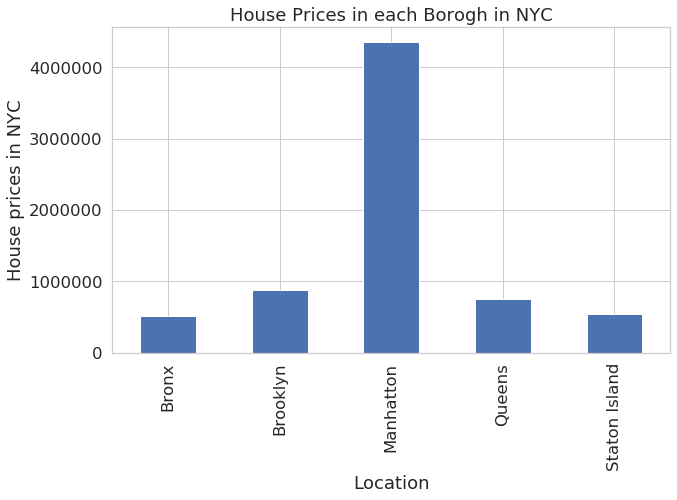

In [45]:
NYC["MEDIAN SALE PRICE"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Location')
plt.ylabel('House prices in NYC')
plt.title('House Prices in each Borogh in NYC')

plt.show()

In [46]:
LDN.columns

Index(['arrest/1000', 'Median_House_Price,_2015'], dtype='object')

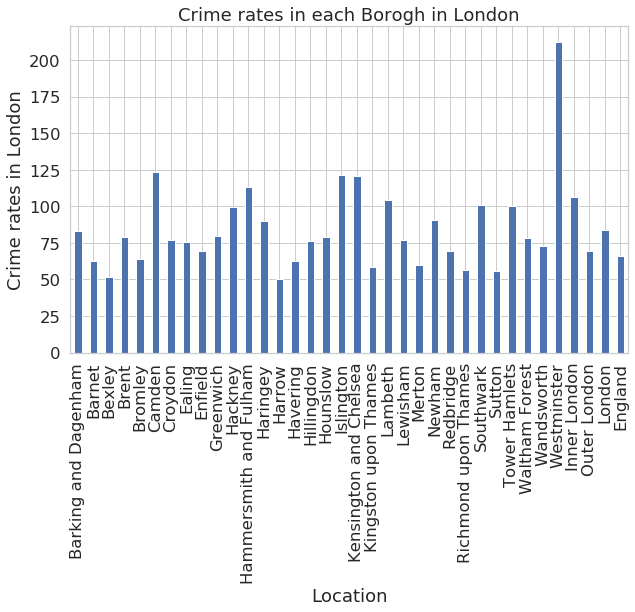

In [47]:
LDN["arrest/1000"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Location')
plt.ylabel('Crime rates in London')
plt.title('Crime rates in each Borogh in London')

plt.show()

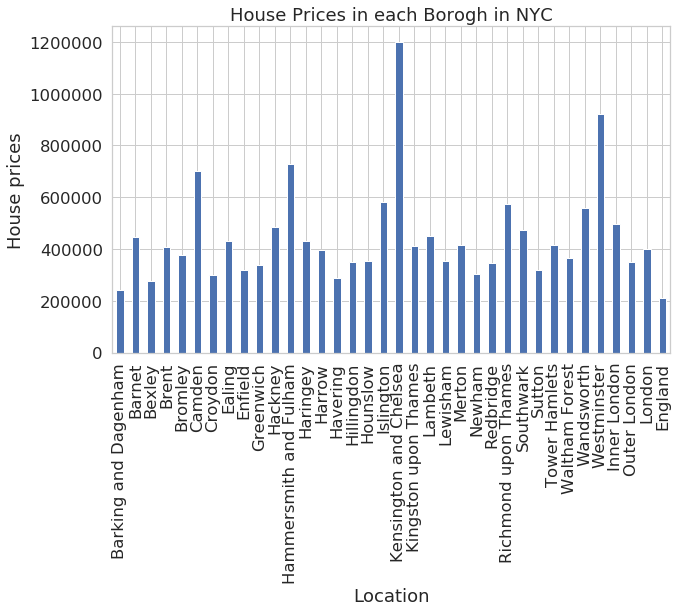

In [48]:
LDN["Median_House_Price,_2015"].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Location')
plt.ylabel('House prices')
plt.title('House Prices in each Borogh in NYC')

plt.show()

In [49]:
LDN.describe()

,arrest/1000,"Median_House_Price,_2015"
count,36.000000,3.600000e+01
mean,84.480556,4.448719e+05
std,29.811664,1.922015e+05
min,50.400000,2.099950e+05
25%,65.300000,3.437500e+05
50%,77.500000,4.036000e+05
75%,99.675000,4.775000e+05
max,212.400000,1.200000e+06


In [50]:
NYC.describe()

,arrest_per_thousand,MEDIAN SALE PRICE
count,5.000000,5.000000e+00
mean,7.088502,1.408611e+06
std,2.040000,1.649671e+06
min,5.285755,5.123333e+05
25%,5.344904,5.422230e+05
50%,6.262945,7.546667e+05
75%,9.031504,8.871667e+05
max,9.517404,4.346667e+06


In [51]:
NYC["MEDIAN SALE PRICE"] = NYC["MEDIAN SALE PRICE"]/1000000
NYC

,arrest_per_thousand,MEDIAN SALE PRICE
BOROUGH,,
Bronx,9.517404,0.512333
Brooklyn,6.262945,0.887167
Manhatton,9.031504,4.346667
Queens,5.285755,0.754667
Staton Island,5.344904,0.542223


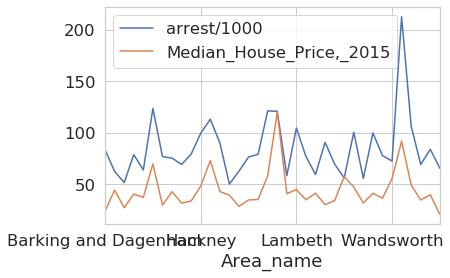

In [53]:
LDN.plot()

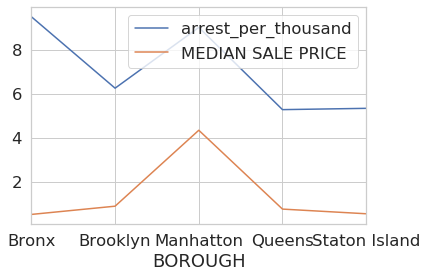

In [54]:
NYC.plot()

## FOURSQUARE

In [55]:
import requests

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  anaconda --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.0.2s-h7b6447c_0 anaconda --> 1.0.2r-h14c3975_0 conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A new

In [56]:
CLIENT_ID = '0E342GFWIDEXUXNAD1CZBA0OAZADAYSFVPL0L1SRBUHRIOX2' # your Foursquare ID
CLIENT_SECRET = '1SRJI3ZOEKVNPXA4T4QXQONHSCWMMNL45IOO3YL2F2B5OLYB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0E342GFWIDEXUXNAD1CZBA0OAZADAYSFVPL0L1SRBUHRIOX2
CLIENT_SECRET:1SRJI3ZOEKVNPXA4T4QXQONHSCWMMNL45IOO3YL2F2B5OLYB


Coffee Shops around Westminster, UK

In [57]:
latitude = 51.49
longitude = -0.13

search_query = 'Coffee Shop'
radius = 500
LIMIT = 500

In [58]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0E342GFWIDEXUXNAD1CZBA0OAZADAYSFVPL0L1SRBUHRIOX2&client_secret=1SRJI3ZOEKVNPXA4T4QXQONHSCWMMNL45IOO3YL2F2B5OLYB&ll=51.49,-0.13&v=20180604&query=Coffee Shop&radius=500&limit=500'

In [59]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5a9e669929510025e4d9cc'},
 'response': {'venues': [{'id': '53a1495d498e8d709a41b0a6',
    'name': 'pimlico village coffee shop',
    'location': {'lat': 51.488846188177064,
     'lng': -0.13461200840747686,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.488846188177064,
       'lng': -0.13461200840747686}],
     'distance': 344,
     'cc': 'GB',
     'city': 'SW1',
     'country': 'United Kingdom',
     'formattedAddress': ['SW1', 'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1566219878',
    'hasPerk': False},
   {'id': '4ad4709ff964a520e0e720e3',
    'name': 'Relish Sandwich Shop',
    'location': {'address': '8 John Islip St',
     'lat': 51.4896772538

In [60]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.country,location.formattedAddress,location.address,location.postalCode,location.neighborhood,location.state,location.crossStreet
0,53a1495d498e8d709a41b0a6,pimlico village coffee shop,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1566219878,False,51.488846,-0.134612,"[{'label': 'display', 'lat': 51.48884618817706...",344,GB,SW1,United Kingdom,"[SW1, United Kingdom]",NaN,NaN,NaN,NaN,NaN
1,4ad4709ff964a520e0e720e3,Relish Sandwich Shop,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",v-1566219878,False,51.489677,-0.130295,"[{'label': 'display', 'lat': 51.48967725380611...",41,GB,London,United Kingdom,"[8 John Islip St, London, Greater London, SW1P...",8 John Islip St,SW1P 4PY,"Millbank, London, Greater London",Greater London,NaN
2,4c5288329d642d7faee759df,Pimlico Village,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1566219878,False,51.488894,-0.134423,"[{'label': 'display', 'lat': 51.48889361440739...",330,GB,Pimlico,United Kingdom,"[5 Lupus St. (at Aylesford St.), Pimlico, Grea...",5 Lupus St.,SW1V 3AS,NaN,Greater London,at Aylesford St.
3,4f367079e4b0ea2d7cc64038,Gallery Shop - Tate Britain,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1566219878,False,51.490919,-0.127554,"[{'label': 'display', 'lat': 51.49091857269487...",197,GB,London,United Kingdom,"[Millbank, London, Greater London, United King...",Millbank,NaN,NaN,Greater London,NaN
4,590dfae625fb7b50fb52ea28,Lalo's Barber Shop,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1566219878,False,51.489630,-0.131181,"[{'label': 'display', 'lat': 51.48963, 'lng': ...",91,GB,London,United Kingdom,"[12a Vauxhall Bridge Road, London, Greater Lon...",12a Vauxhall Bridge Road,SW1V 2SD,NaN,Greater London,NaN


In [61]:
dataframe.shape

(16, 18)

Coffee Shops aroumd 

Coffee Shops around the Bronx, USA

In [62]:
latitude = 40.84
longitude = -73.86

search_query = 'Coffee Shop'
radius = 500
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5a9e6622be12003183743b'},
 'response': {'venues': [{'id': '4e4e297abd4101d0d7a3af75',
    'name': "John's Donut Coffee Shop",
    'location': {'address': '1786 Westchester Ave',
     'lat': 40.839603156980544,
     'lng': -73.86665556669777,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.839603156980544,
       'lng': -73.86665556669777}],
     'distance': 562,
     'postalCode': '10472',
     'cc': 'US',
     'city': 'Bronx',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1786 Westchester Ave',
      'Bronx, NY 10472',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d148941735',
      'name': 'Donut Shop',
      'pluralName': 'Donut Shops',
      'shortName': 'Donuts',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1566219878',
    'hasPerk': False},
   {'id': '4df7674c1838c789e

In [63]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4e4e297abd4101d0d7a3af75,John's Donut Coffee Shop,"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",v-1566219878,False,1786 Westchester Ave,40.839603,-73.866656,"[{'label': 'display', 'lat': 40.83960315698054...",562,...,NY,United States,"[1786 Westchester Ave, Bronx, NY 10472, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4df7674c1838c789e8b94b1a,M & V Coffee Shop,[],v-1566219878,False,Archer st,40.837636,-73.867017,"[{'label': 'display', 'lat': 40.83763554185773...",646,...,NY,United States,"[Archer st, Bronx, NY 10460, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4adb9b03f964a520552921e3,Ellie's Diner,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1566219878,False,58 Metropolitan Oval,40.837880,-73.860132,"[{'label': 'display', 'lat': 40.83788039213797...",236,...,NY,United States,"[58 Metropolitan Oval (Unionport Rd), Bronx, N...",Unionport Rd,305994,https://www.seamless.com/menu/ellies-diner-58-...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png
3,4b3d1afef964a520148e25e3,Beato Barber Shop,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1566219878,False,1665 Unionport Rd,40.839641,-73.858018,"[{'label': 'display', 'lat': 40.83964133533965...",171,...,NY,United States,"[1665 Unionport Rd, Bronx, NY 10462, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52b61ed911d22f848327f2d4,Beato Barber Shop,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1566219878,False,NaN,40.839661,-73.858031,"[{'label': 'display', 'lat': 40.83966080529721...",170,...,NY,United States,"[Bronx, NY, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Stattan Island, Harrow are the best Neightbourhoods in eash city, comparing the crime rates and house prices.

Statton Island

In [64]:
latitude = 40.67
longitude = -74.16

search_query = 'Coffee Shop'
radius = 500
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5a9e666adbf5002c921cb0'},
 'response': {'venues': [{'id': '4c4538b2dcd61b8de27c7c56',
    'name': 'APM Terminals',
    'location': {'address': '5080 McLester St',
     'lat': 40.669067255477025,
     'lng': -74.15998935699463,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.669067255477025,
       'lng': -74.15998935699463}],
     'distance': 103,
     'postalCode': '07201',
     'cc': 'US',
     'city': 'Elizabeth',
     'state': 'NJ',
     'country': 'United States',
     'formattedAddress': ['5080 McLester St',
      'Elizabeth, NJ 07201',
      'United States']},
    'categories': [{'id': '4e74f6cabd41c4836eac4c31',
      'name': 'Pier',
      'pluralName': 'Piers',
      'shortName': 'Piers',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/ferry_pier_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1566219878',
    'hasPerk': False},
   {'id': '4dc3f10745dd264552495537',
    'nam

In [65]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4c4538b2dcd61b8de27c7c56,APM Terminals,"[{'id': '4e74f6cabd41c4836eac4c31', 'name': 'P...",v-1566219878,False,5080 McLester St,40.669067,-74.159989,"[{'label': 'display', 'lat': 40.66906725547702...",103,07201,US,Elizabeth,NJ,United States,"[5080 McLester St, Elizabeth, NJ 07201, United..."
1,4dc3f10745dd264552495537,Sealand Chassie Shop,[],v-1566219878,False,Tripoli St,40.668375,-74.157018,"[{'label': 'display', 'lat': 40.668375, 'lng':...",310,07201,US,Elizabeth,NJ,United States,"[Tripoli St, Elizabeth, NJ 07201, United States]"


In [66]:
dataframe.shape

(2, 16)

Harrow

In [67]:
latitude = 51.58
longitude = --0.35

search_query = 'Coffee Shop'
radius = 500
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5a9e675d891b002ce5b6b0'},
 'response': {'venues': []}}

In [68]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

""
